# 4.Advance Modeling<a id='4.Advance Modeling'></a>


## 4.1 Contents<a id='4.1_Contents'></a>

  * [4.2 Introduction](#4.2_Introduction)   
  * [4.3 Load The Data](#4.3_Load_The_Data)  
  * [4.4 Random Forest Regressor](#4.4_Random_Forest_Regressor)  
  * [4.5 LGBM Regressors](#4.5_LGBM_Regressors)      
  * [4.6 XGBOOST Regressors](#4.6_XGBOOST_Regressors)
  * [4.7 Hyperparameter Tuning using GridSearchCV](#4.7_Hyperparameter_Tuning_using_GridSearchCV)  
  * [4.8 Hyperparameter Tuning using RandomizedSearchCV](#4.8_Hyperparameter_Tuning_using_RandomizedSearchCV)
  * [4.9 Save data](#4.9_Save_data)
  * [4.10 Summary](#4.10_Summary)

## 4.2 Introduction<a id='4.2_Introduction'></a>

In this Advance modeling phase of our notebook, we aim to predict house prices accurately, by using 3 models RandomForest Regressor, LGBM Regressor and XGBOOST Regressor.
Additionally, we will employ two hyperparameter tuning tools, GridSearchCV and RandomizedSearchCV, to optimize the performance of these models and ensure precise price predictions for houses

In [1]:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#import plotly.express as px
import seaborn as sns
import os
import numpy as np
%matplotlib inline
from matplotlib.gridspec import GridSpec
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
import math
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

#!pip install xgboost
#pip install lightgbm
#pip install xgboost

## 4.3 Load The Data<a id='4.3_Load_The_Data'></a>

In [2]:
X_train = pd.read_pickle("./cleaned_data/X_tr_scaled.pkl") #X_tr_scaled.to_pickle("./cleaned_data/X_tr_scaled.pkl") 

In [3]:
X_test= pd.read_pickle("./cleaned_data/X_te_scaled.pkl") #X_te_scaled.to_pickle("./cleaned_data/X_te_scaled.pkl")

In [4]:
y_train= pd.read_pickle("./cleaned_data/y_train.pkl") #y_train.to_pickle("./cleaned_data/y_train.pkl")

In [5]:
y_test = pd.read_pickle("./cleaned_data/y_test.pkl") #y_test.to_pickle("./cleaned_data/y_test.pkl")

In [6]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.799560,0.181850,-0.817582,-0.539845,-0.757948,1.420006,0.155143,-0.285105,0.394301,0.494614,...,-0.070117,-0.306950,-0.044281,0.404980,-0.275299,-0.054259,-0.062684,-0.117851,0.465475,-0.308855
1,0.321904,-0.314372,-1.550537,1.263166,-1.670795,-0.574380,-1.012563,-0.285105,0.108479,-1.091242,...,-0.070117,-0.306950,-0.044281,0.404980,-0.275299,-0.054259,-0.062684,-0.117851,0.465475,-0.308855
2,-0.872237,-0.129258,0.648328,-0.539845,0.875568,-0.574380,-1.012563,-0.285105,2.236268,1.285008,...,-0.070117,-0.306950,-0.044281,0.404980,-0.275299,-0.054259,-0.062684,-0.117851,0.465475,-0.308855
3,0.321904,1.552023,-0.084627,0.361661,-1.670795,-0.574380,1.621781,-0.285105,-0.753526,0.803678,...,-0.070117,-0.306950,-0.044281,0.404980,-0.275299,-0.054259,-0.062684,-0.117851,0.465475,-0.308855
4,0.083076,-0.000721,0.648328,0.361661,1.067746,-0.574380,-1.012563,-0.285105,0.680123,-0.452846,...,-0.070117,3.257858,-0.044281,-2.469255,-0.275299,-0.054259,-0.062684,-0.117851,-2.148345,3.237769


[<a href="#4.Advance Modeling">Back to top</a>]

In [7]:
X_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.872237,0.590728,0.648328,-0.539845,1.019701,-0.428052,-1.012563,-0.285105,2.485795,1.563673,...,-0.070117,3.257858,-0.044281,-2.469255,-0.275299,-0.054259,-0.062684,-0.117851,-2.148345,3.237769
1,-0.872237,-0.344885,0.648328,-0.539845,0.971657,-0.574380,-0.055044,-0.285105,0.537212,0.426214,...,-0.070117,-0.306950,-0.044281,0.404980,-0.275299,-0.054259,-0.062684,-0.117851,0.465475,-0.308855
2,0.560732,-0.151635,-0.084627,-0.539845,-0.998171,0.829278,0.444734,1.843307,-0.649178,0.494614,...,-0.070117,-0.306950,-0.044281,0.404980,-0.275299,-0.054259,-0.062684,-0.117851,0.465475,-0.308855
3,-0.872237,0.315218,1.381283,-0.539845,0.395122,-0.574380,1.862328,-0.285105,3.164056,5.439645,...,-0.070117,-0.306950,-0.044281,0.404980,-0.275299,-0.054259,-0.062684,-0.117851,0.465475,-0.308855
4,2.471358,-0.959601,-0.817582,0.361661,-0.373591,-0.574380,0.267242,0.810774,-1.220822,-0.749244,...,-0.070117,-0.306950,-0.044281,0.404980,-0.275299,-0.054259,-0.062684,-0.117851,0.465475,-0.308855


In [8]:
y_train.head()

,SalePrice
1350,200000
1408,125500
276,201000
417,239000
686,227875


[<a href="#4.Advance Modeling">Back to top</a>]

In [9]:
y_test.head()

,SalePrice
0,240000
1,185000
2,168500
3,430000
4,127000


## 4.4 Random Forest Regressor<a id='4.4_Random_Forest_Regressor'></a>

In [10]:
rf_model = RandomForestRegressor()

In [11]:
#converted the target  data into 1D
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [12]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

[<a href="#4.Advance Modeling">Back to top</a>]

In [13]:
y_rf_pred = rf_model.predict(X_test)

In [14]:
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mape = mean_absolute_percentage_error(y_test, y_rf_pred)

rf_mae =round(rf_mae )
rf_mape=math.ceil(rf_mape*100)

In [15]:
print('The mean absolute error with RandomForestRegressor is:$', rf_mae, '\nThe mean absolute percentage error with RandomForestRegressor is:', rf_mape,"%")

The mean absolute error with RandomForestRegressor is:$ 19679 
The mean absolute percentage error with RandomForestRegressor is: 12 %


## 4.5 LGBM Regressors<a id='4.5_LGBM_Regressors'></a>

In [16]:

lgb_model = lgb.LGBMRegressor()

In [17]:
lgb_model.fit(X_train, y_train)

LGBMRegressor()

In [18]:
y_lgb_pred = lgb_model.predict(X_test)

In [19]:
lgb_mae = mean_absolute_error(y_test, y_lgb_pred)
lgb_mape = mean_absolute_percentage_error(y_test, y_lgb_pred)

lgb_mae =round(lgb_mae )
lgb_mape=math.ceil(lgb_mape*100)

In [20]:
print('The mean absolute error with LGBMRegressor is:$', lgb_mae, '\nThe mean absolute percentage error with LGBMRegressor is:', lgb_mape,'%')

The mean absolute error with LGBMRegressor is:$ 17976 
The mean absolute percentage error with LGBMRegressor is: 11 %


## 4.6 XGBOOST Regressors<a id='4.6_XGBOOST_Regressors'></a>

In [21]:
xgb_model = xgb.XGBRegressor()

[<a href="#4.Advance Modeling">Back to top</a>]

In [22]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [23]:
y_xgb_pred= xgb_model.predict(X_test)

[<a href="#4.Advance Modeling">Back to top</a>]

In [24]:
xgb_mae = mean_absolute_error(y_test, y_xgb_pred)
xgb_mape = mean_absolute_percentage_error(y_test, y_xgb_pred)
xgb_mae =round(xgb_mae )
xgb_mape=math.ceil(xgb_mape*100)


In [25]:
print('The mean absolute error with RandomForestRegressor is:$', rf_mae, '\nThe mean absolute percentage error with RandomForestRegressor is:', rf_mape,'%')

print('The mean absolute error with LGBMRegressor is:$', lgb_mae, '\nThe mean absolute percentage error with LGBMRegressor is:', lgb_mape,'%')

print('The mean absolute error with XGBRegressor is:$', xgb_mae , '\nThe mean absolute percentage error with XGBRegressor is:', xgb_mape,'%')

The mean absolute error with RandomForestRegressor is:$ 19679 
The mean absolute percentage error with RandomForestRegressor is: 12 %
The mean absolute error with LGBMRegressor is:$ 17976 
The mean absolute percentage error with LGBMRegressor is: 11 %
The mean absolute error with XGBRegressor is:$ 18707 
The mean absolute percentage error with XGBRegressor is: 12 %


<font color=blue>__Plotting Cross-Validated Predictions of all 3 Models__

In [26]:

y_test_plot=pd.DataFrame({'y_test_plot':y_test})
y_te_rf_pred=pd.DataFrame({'y_te_rf_pred':y_rf_pred})
y_te_lgb_pred=pd.DataFrame({'y_te_lgb_pred':y_lgb_pred})
y_te_xgb_pred=pd.DataFrame({'y_te_xgb_pred':y_xgb_pred})


y_test_plot=y_test_plot.round(0)
y_te_rf_pred=y_te_rf_pred.round(0)
y_te_lgb_pred=y_te_lgb_pred.round(0)
y_te_xgb_pred=y_te_xgb_pred.round(0)

df= pd.concat([y_test_plot, y_te_rf_pred, y_te_lgb_pred,y_te_xgb_pred], axis=1)

df.head()

,y_test_plot,y_te_rf_pred,y_te_lgb_pred,y_te_xgb_pred
0,240000,240039.0,237696.0,237300.0
1,185000,183632.0,188510.0,186015.0
2,168500,162694.0,162614.0,176124.0
3,430000,435371.0,382783.0,361379.0
4,127000,155448.0,149790.0,150313.0


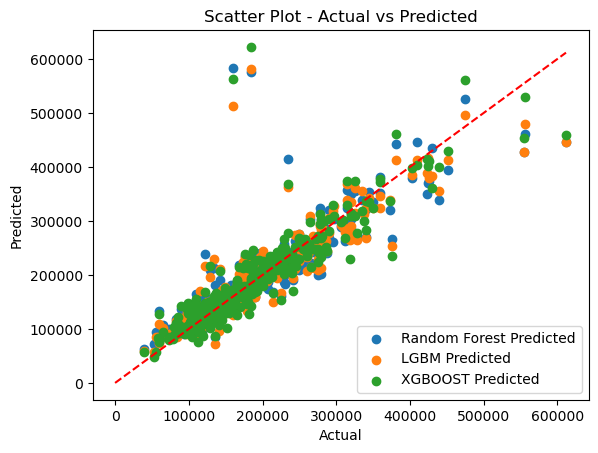

In [27]:
plt.scatter(df['y_test_plot'],df['y_te_rf_pred'], label='Random Forest Predicted')

# Create a scatter plot for y_te_lgb_pred
plt.scatter(df['y_test_plot'],df['y_te_lgb_pred'], label='LGBM Predicted')

# Create a scatter plot for y_test_plot (actual values)
plt.scatter(df['y_test_plot'],df['y_te_xgb_pred'], label='XGBOOST Predicted')

x = np.linspace(0, max(df['y_test_plot']), 100)
y = x
plt.plot(x, y, 'r--')

# Add labels and title to the plot
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot - Actual vs Predicted')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

[<a href="#4.Advance Modeling">Back to top</a>]

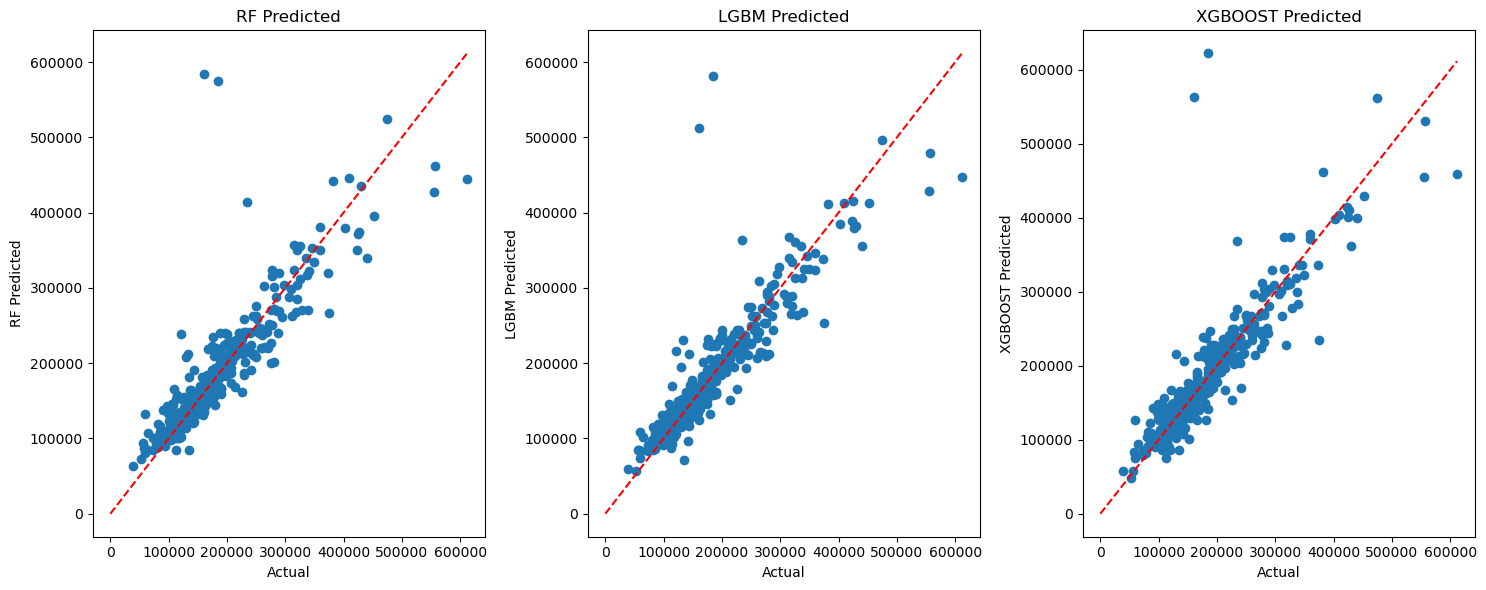

In [28]:
fig, axes = plt.subplots(1,3, figsize=(15, 6))

# Scatter plot for RF Predicted
axes[0].scatter(df['y_test_plot'], df['y_te_rf_pred'])
axes[0].plot([0, max(df['y_test_plot'])], [0, max(df['y_test_plot'])], 'r--')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('RF Predicted')
axes[0].set_title('RF Predicted')

# Scatter plot for LGB Predicted
axes[1].scatter(df['y_test_plot'], df['y_te_lgb_pred'])
axes[1].plot([0, max(df['y_test_plot'])], [0, max(df['y_test_plot'])], 'r--')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('LGBM Predicted')
axes[1].set_title('LGBM Predicted')

# Scatter plot for Actual
axes[2].scatter(df['y_test_plot'], df['y_te_xgb_pred'])
axes[2].plot([0, max(df['y_test_plot'])], [0, max(df['y_test_plot'])], 'r--')
axes[2].set_xlabel('Actual')
axes[2].set_ylabel('XGBOOST Predicted')
axes[2].set_title('XGBOOST Predicted')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

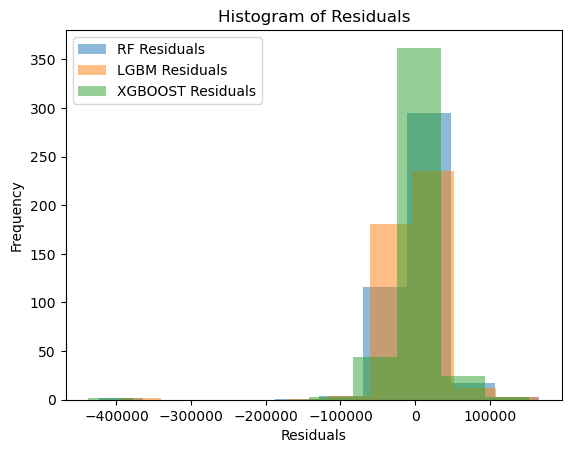

In [29]:
residuals_rf = df['y_test_plot'] - df['y_te_rf_pred']
residuals_lgb = df['y_test_plot'] - df['y_te_lgb_pred']
residuals_xgb = df['y_test_plot'] - df['y_te_xgb_pred']

# Create a figure and a single subplot for the histogram
fig, ax = plt.subplots()

# Plot the histograms
ax.hist(residuals_rf, bins=10, alpha=0.5, label='RF Residuals')
ax.hist(residuals_lgb, bins=10, alpha=0.5, label='LGBM Residuals')
ax.hist(residuals_xgb , bins=10, alpha=0.5, label='XGBOOST Residuals')

# Set labels and title
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Residuals')

# Add a legend
ax.legend()

# Display the histogram
plt.show()

## 4.7 Hyperparameter Tuning using GridSearchCV<a id='4.7_Hyperparameter_Tuning_using_GridSearchCV'></a>

### Random Forest Regressors

[<a href="#4.Advance Modeling">Back to top</a>]

In [30]:


rf_param_grid = {'max_depth':[None],
                 'max_features': ['auto'],
                 'min_samples_leaf':[2],
                 'min_samples_split': [2],
                 'n_estimators': [100]}


#(actual)rf_param_grid = {'n_estimators': [100, 200,300],'max_depth': [None, 5, 10],
#'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt']}

In [31]:
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

C:\Users\asiya\anaconda3\envs\unit26\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\asiya\anaconda3\envs\unit26\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\asiya\anaconda3\envs\unit26\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None], 'max_features': ['auto'],
                         'min_samples_leaf': [2], 'min_samples_split': [2],
                         'n_estimators': [100]})

In [32]:
# Get the best Random Forest model from Grid Search
best_rf_model = rf_grid_search.best_estimator_
best_rf_model 

RandomForestRegressor(max_features='auto', min_samples_leaf=2)

In [33]:
rf_grid_search.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [34]:
y_Grid_rf_pred = best_rf_model.predict(X_test)
Grid_rf_mae = mean_absolute_error(y_test, y_Grid_rf_pred)
Grid_rf_mape = mean_absolute_percentage_error(y_test, y_Grid_rf_pred)


Grid_rf_mae =round(Grid_rf_mae )
Grid_rf_mape=math.ceil(Grid_rf_mape*100)

print("Mean Absolute Error:$",Grid_rf_mae)
print("Mean Absolute Percentage Error:", Grid_rf_mape,'%')

Mean Absolute Error:$ 19455
Mean Absolute Percentage Error: 12 %


###  LGBM Regressors

In [35]:
param_grid = {'n_estimators': [100,200, 300],
              'num_leaves': [14, 28, 42],
              'learning_rate': [0.03,0.1],
              'max_depth': [3, 5],
              'subsample': [ 0.8,0.9],
              'colsample_bytree': [0.6, 0.8, 1.0],
              }



lgb_grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, n_jobs=-1)
lgb_grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.03, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [14, 28, 42], 'subsample': [0.8, 0.9]})

In [36]:
# Get the best LGBM model from Grid Search
best_lgb_model = lgb_grid_search.best_estimator_
best_lgb_model 

LGBMRegressor(colsample_bytree=0.8, max_depth=3, n_estimators=300,
              num_leaves=14, subsample=0.8)

In [37]:
print("Best parameters for LGBM Regressors: ", lgb_grid_search.best_params_)

Best parameters for LGBM Regressors:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'num_leaves': 14, 'subsample': 0.8}


[<a href="#4.Advance Modeling">Back to top</a>]

In [38]:
y_Grid_lgb_pred = best_lgb_model.predict(X_test)
Grid_lgb_mae  = mean_absolute_error(y_test, y_Grid_lgb_pred )
Grid_lgb_mape = mean_absolute_percentage_error(y_test, y_Grid_lgb_pred )

Grid_lgb_mae=round(Grid_lgb_mae)
Grid_lgb_mape=math.ceil(Grid_lgb_mape*100)

print("Mean Absolute Error:", Grid_lgb_mae )
print("Mean Absolute Percentage Error:", Grid_lgb_mape,"%")

Mean Absolute Error: 16758
Mean Absolute Percentage Error: 11 %


### XGBOOST Regressors

In [39]:
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [200],
    'max_depth': [3],   
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'learning_rate': [0.1],
                         'max_depth': [3], 'n_estimators': [200],
                         'subsample': [0.8]})

In [40]:
# Get the best LGBM model from Grid Search
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
print("Best parameters for XGBOOST Regressors: ", xgb_grid_search.best_params_)

Best parameters for XGBOOST Regressors:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [42]:
y_Grid_xgb_pred = best_xgb_model.predict(X_test)
Grid_xgb_mae  = mean_absolute_error(y_test, y_Grid_xgb_pred)
Grid_xgb_mape = mean_absolute_percentage_error(y_test, y_Grid_xgb_pred)

Grid_xgb_mae=round(Grid_xgb_mae)
Grid_xgb_mape=math.ceil(Grid_xgb_mape*100)


print("Mean Absolute Error:", round(Grid_xgb_mae) )
print("Mean Absolute Percentage Error:", Grid_xgb_mape,"%")

Mean Absolute Error: 16718
Mean Absolute Percentage Error: 11 %


### comaprision of models after Hyperparameter Tuning using GridSearchCV

In [43]:
y_test_plot=pd.DataFrame({'y_test_plot':y_test})
y_GridP_rf_pred=pd.DataFrame({'y_Grid_rf_pred':y_Grid_rf_pred})
y_GridP_lgb_pred=pd.DataFrame({'y_Grid_lgb_pred':y_Grid_lgb_pred})
y_GridP_xgb_pred=pd.DataFrame({'y_Grid_xgb_pred':y_Grid_xgb_pred})


y_test_plot=y_test_plot.round(0)
y_GridP_rf_pred=y_GridP_rf_pred.round(0)
y_GridP_lgb_pred=y_GridP_lgb_pred.round(0)
y_GridP_xgb_pred=y_GridP_xgb_pred.round(0)

df1= pd.concat([y_test_plot, y_GridP_rf_pred,y_GridP_lgb_pred,y_GridP_xgb_pred], axis=1)

df1.head()

,y_test_plot,y_Grid_rf_pred,y_Grid_lgb_pred,y_Grid_xgb_pred
0,240000,235915.0,234716.0,243907.0
1,185000,184764.0,192249.0,189957.0
2,168500,161080.0,152480.0,152255.0
3,430000,426142.0,363111.0,417262.0
4,127000,154741.0,132160.0,127176.0


[<a href="#4.Advance Modeling">Back to top</a>]

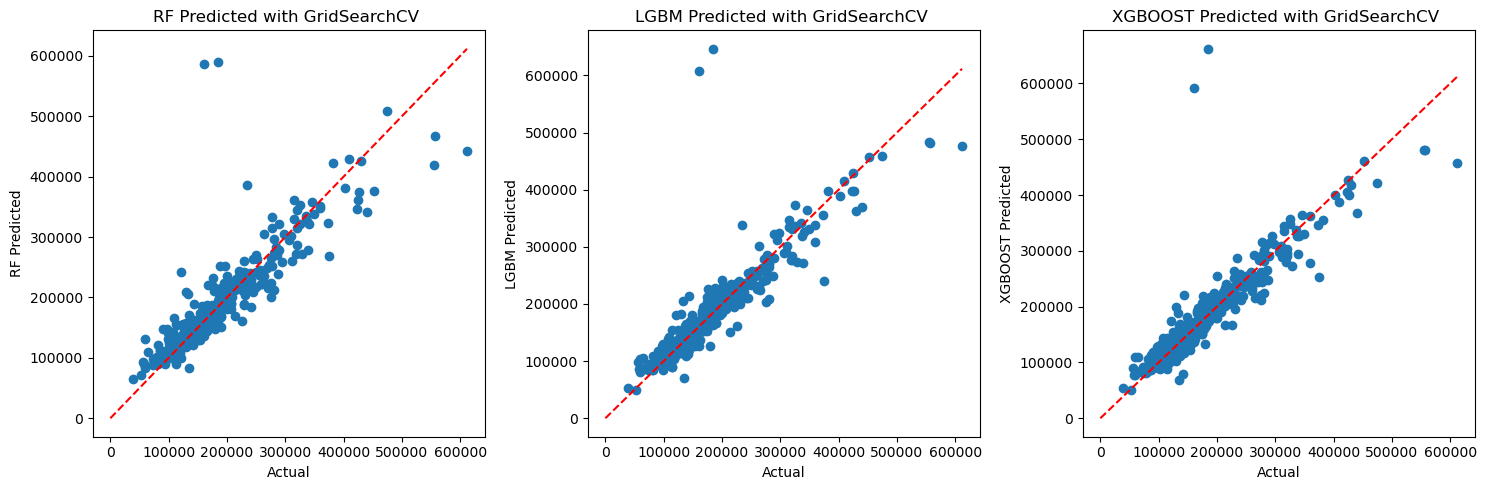

In [44]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

# Scatter plot for RF Predicted
axes[0].scatter(df1['y_test_plot'], df1['y_Grid_rf_pred'])
axes[0].plot([0, max(df1['y_test_plot'])], [0, max(df1['y_test_plot'])], 'r--')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('RF Predicted')
axes[0].set_title('RF Predicted with GridSearchCV ')

# Scatter plot for LGB Predicted
axes[1].scatter(df1['y_test_plot'], df1['y_Grid_lgb_pred'])
axes[1].plot([0, max(df1['y_test_plot'])], [0, max(df1['y_test_plot'])], 'r--')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('LGBM Predicted')
axes[1].set_title('LGBM Predicted with GridSearchCV ')

# Scatter plot for Actual
axes[2].scatter(df1['y_test_plot'], df1['y_Grid_xgb_pred'])
axes[2].plot([0, max(df1['y_test_plot'])], [0, max(df1['y_test_plot'])], 'r--')
axes[2].set_xlabel('Actual')
axes[2].set_ylabel('XGBOOST Predicted')
axes[2].set_title('XGBOOST Predicted with GridSearchCV ')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

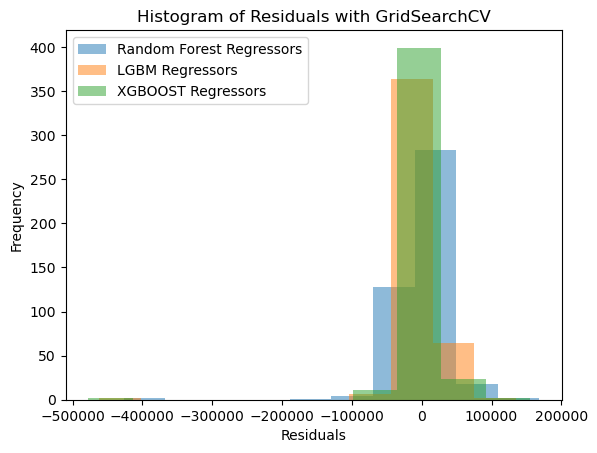

In [45]:
residuals_Grid_rf = df1['y_test_plot'] - df1['y_Grid_rf_pred']
residuals_Grid_lgb = df1['y_test_plot'] - df1['y_Grid_lgb_pred']
residuals_Grid_xgb = df1['y_test_plot'] - df1['y_Grid_xgb_pred']

# Create a figure and a single subplot for the histogram
fig, ax = plt.subplots()

# Plot the histograms
ax.hist(residuals_Grid_rf, bins=10, alpha=0.5, label='Random Forest Regressors')
ax.hist(residuals_Grid_lgb, bins=10, alpha=0.5, label='LGBM Regressors')
ax.hist(residuals_Grid_xgb , bins=10, alpha=0.5, label='XGBOOST Regressors')



# Set labels and title
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Residuals with GridSearchCV')

# Add a legend
ax.legend(loc='upper left')

# Display the histogram
plt.show()

In [46]:
print('The mean absolute error with RandomForestRegressor is:$', rf_mae, '\nThe mean absolute percentage error with RandomForestRegressor is:', rf_mape,'%')

print('The mean absolute error with LGBMRegressor is:$', lgb_mae, '\nThe mean absolute percentage error with LGBMRegressor is:', lgb_mape,'%' )

print('The mean absolute error with XGBRegressor is:$', xgb_mae , '\nThe mean absolute percentage error with XGBRegressor is:', xgb_mape,'%')

The mean absolute error with RandomForestRegressor is:$ 19679 
The mean absolute percentage error with RandomForestRegressor is: 12 %
The mean absolute error with LGBMRegressor is:$ 17976 
The mean absolute percentage error with LGBMRegressor is: 11 %
The mean absolute error with XGBRegressor is:$ 18707 
The mean absolute percentage error with XGBRegressor is: 12 %


In [47]:
print('The mean absolute error with RandomForestRegressor after tuning:$', Grid_rf_mae, '\nThe mean absolute percentage error with RandomForestRegressor after Gridsearch:',  Grid_rf_mape,'%')

print('The mean absolute error with LGBMRegressor after tuning is:$', Grid_lgb_mae, '\nThe mean absolute percentage error with LGBMRegressor after Gridsearch:', Grid_lgb_mape,'%' )

print('The mean absolute error with XGBRegressor after tuning is:$', Grid_xgb_mae , '\nThe mean absolute percentage error with XGBRegressor after Gridsearch:',  Grid_xgb_mape,'%')

The mean absolute error with RandomForestRegressor after tuning:$ 19455 
The mean absolute percentage error with RandomForestRegressor after Gridsearch: 12 %
The mean absolute error with LGBMRegressor after tuning is:$ 16758 
The mean absolute percentage error with LGBMRegressor after Gridsearch: 11 %
The mean absolute error with XGBRegressor after tuning is:$ 16718 
The mean absolute percentage error with XGBRegressor after Gridsearch: 11 %


## 4.8 Hyperparameter Tuning using Random search(RandomizedSearchCV)<a id='4.8_Hyperparameter_Tuning_using_Random_search(RandomizedSearchCV)'></a>

### Random Forest Regressors

In [48]:
from sklearn.model_selection import RandomizedSearchCV
rf_model = RandomForestRegressor()

param_grid = { 'n_estimators': range(100, 1000, 100), 
              'max_depth': range(2, 20),
              'max_features': ['sqrt', 'log2']}




rf_random_search = RandomizedSearchCV(rf_model ,param_distributions=param_grid,random_state=42,n_iter=10,cv=5)
rf_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(2, 20),
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': range(100, 1000, 100)},
                   random_state=42)

In [49]:
# Get the best Random Forest model from Random Search
best_rf_model = rf_random_search.best_estimator_
best_rf_model 

RandomForestRegressor(max_depth=14, max_features='sqrt', n_estimators=400)

In [50]:
rf_random_search.best_params_

{'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 14}

In [51]:
y_Random_rf_pred= best_rf_model.predict(X_test)
Random_rf_mae = mean_absolute_error(y_test, y_Random_rf_pred)
Random_rf_mape = mean_absolute_percentage_error(y_test, y_Random_rf_pred)

Random_rf_mae=round(Random_rf_mae)
Random_rf_mape=math.ceil(Random_rf_mape*100)


print("Mean Absolute Error: $", Random_rf_mae)
print("Mean Absolute Percentage Error:", Random_rf_mape,'%')

Mean Absolute Error: $ 19814
Mean Absolute Percentage Error: 12 %


###  LGBM Regressors

In [52]:
lgb_model = lgb.LGBMRegressor()


param_grid= {
    'n_estimators': range(300),
    'max_depth': range(2),
    'learning_rate': [ 0.2, 0.3],
    'num_leaves': range(42),
    'subsample': [ 0.9],
    'colsample_bytree': [ 0.7],
}

#param_grid= {'n_estimators': range(100, 1000, 100),
#'max_depth': range(2, 20),'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
#'num_leaves': range(20, 50),'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],}

In [53]:

# Perform Grid Search for LGBM
lgb_random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid, cv=5)

lgb_random_search .fit(X_train, y_train)

# Get the best LGBM model from Grid Search
best_lgb_model = lgb_random_search.best_estimator_
best_lgb_model 

LGBMRegressor(colsample_bytree=0.7, learning_rate=0.2, max_depth=1,
              n_estimators=280, num_leaves=14, subsample=0.9)

In [54]:
print("Best parameters for LGBM Regressors: ", lgb_random_search .best_params_)

Best parameters for LGBM Regressors:  {'subsample': 0.9, 'num_leaves': 14, 'n_estimators': 280, 'max_depth': 1, 'learning_rate': 0.2, 'colsample_bytree': 0.7}


In [55]:
y_Random_lgb_pred = best_lgb_model.predict(X_test)
Random_lgb_mae  = mean_absolute_error(y_test, y_Random_lgb_pred)
Random_lgb_mape = mean_absolute_percentage_error(y_test, y_Random_lgb_pred)

Random_lgb_mae=round(Random_lgb_mae)
Random_lgb_mape=math.ceil(Random_lgb_mape*100)

print("Mean Absolute Error: $",Random_lgb_mae)
print("Mean Absolute Percentage Error: ", Random_lgb_mape,'%')

Mean Absolute Error: $ 18152
Mean Absolute Percentage Error:  11 %


[<a href="#4.Advance Modeling">Back to top</a>]

### XGBOOST Regressors

In [56]:

xgb_model = xgb.XGBRegressor()

param_grid = {
    'n_estimators': range(100, 300),
    'max_depth': range(2, 20),
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9,],
}

xgb_random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid,n_iter=10, cv=5)
xgb_random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': range(2, 20),
                                        'n_estimators': range(100, 300),
                                        'subsample': [0.6, 0.7, 0.8, 0.9]})

In [57]:
# Get the best LGBM model from Grid Search
best_xgb_model = xgb_random_search.best_estimator_
best_xgb_model 

print("Best parameters for XGBOOST Regressors:", xgb_random_search.best_params_)

y_Random_xgb_pred= best_xgb_model.predict(X_test)
Random_xgb_mae  = mean_absolute_error(y_test, y_Random_xgb_pred)
Random_xgb_mape = mean_absolute_percentage_error(y_test, y_Random_xgb_pred)

Random_xgb_mae=round(Random_xgb_mae)
Random_xgb_mape=math.ceil(Random_xgb_mape*100)

print("Mean Absolute Error: $", Random_xgb_mae )
print("Mean Absolute Percentage Error:", Random_xgb_mape,'%')

Best parameters for XGBOOST Regressors: {'subsample': 0.9, 'n_estimators': 186, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Mean Absolute Error: $ 17261
Mean Absolute Percentage Error: 11 %


## comaprision of 3 models after Hyperparameter Tuning using RandomizedSearchCV

In [58]:
print('The mean absolute error with RandomForestRegressor is:$', rf_mae, '\nThe mean absolute percentage error with RandomForestRegressor is:', rf_mape,'%')

print('The mean absolute error with LGBMRegressor is:$', lgb_mae, '\nThe mean absolute percentage error with LGBMRegressor is:', lgb_mape,'%' )

print('The mean absolute error with XGBRegressor is:$', xgb_mae , '\nThe mean absolute percentage error with XGBRegressor is:', xgb_mape,'%')

The mean absolute error with RandomForestRegressor is:$ 19679 
The mean absolute percentage error with RandomForestRegressor is: 12 %
The mean absolute error with LGBMRegressor is:$ 17976 
The mean absolute percentage error with LGBMRegressor is: 11 %
The mean absolute error with XGBRegressor is:$ 18707 
The mean absolute percentage error with XGBRegressor is: 12 %


In [59]:
print('The mean absolute error with RandomForestRegressor after tuning:$', Random_rf_mae, '\nThe mean absolute percentage error with RandomForestRegressor after tuning is:', Random_rf_mape,'%')

print('The mean absolute error with LGBMRegressor after tuning is:$',Random_lgb_mae, '\nThe mean absolute percentage error with LGBMRegressor after tuning is:', Random_lgb_mape,'%' )

print('The mean absolute error with XGBRegressor after tuning is:$', Random_xgb_mae , '\nThe mean absolute percentage error with XGBRegressor after tuning is:', Random_xgb_mape,'%')

The mean absolute error with RandomForestRegressor after tuning:$ 19814 
The mean absolute percentage error with RandomForestRegressor after tuning is: 12 %
The mean absolute error with LGBMRegressor after tuning is:$ 18152 
The mean absolute percentage error with LGBMRegressor after tuning is: 11 %
The mean absolute error with XGBRegressor after tuning is:$ 17261 
The mean absolute percentage error with XGBRegressor after tuning is: 11 %


<font color=blue>__Plotting Cross-Validated Predictions of all 3 Models with RandomizedSearch CV__

In [60]:
y_test_plot=pd.DataFrame({'y_test_plot':y_test})
y_RandomP_rf_pred=pd.DataFrame({'y_Random_rf_pred':y_Random_rf_pred})
y_RandomP_lgb_pred=pd.DataFrame({'y_Random_lgb_pred':y_Random_lgb_pred})
y_RandomP_xgb_pred=pd.DataFrame({'y_Random_xgb_pred':y_Random_xgb_pred})


y_test_plot=y_test_plot.round(0)
y_RandomP_rf_pred=y_RandomP_rf_pred.round(0)
y_RandomP_lgb_pred=y_RandomP_lgb_pred.round(0)
y_RandomP_xgb_pred=y_RandomP_xgb_pred.round(0)

df3= pd.concat([y_test_plot, y_RandomP_rf_pred, y_RandomP_lgb_pred,y_RandomP_xgb_pred], axis=1)

df3.head()

,y_test_plot,y_Random_rf_pred,y_Random_lgb_pred,y_Random_xgb_pred
0,240000,256021.0,242174.0,245378.0
1,185000,194609.0,192244.0,188556.0
2,168500,159597.0,159989.0,159786.0
3,430000,316485.0,377963.0,345164.0
4,127000,146556.0,134169.0,147650.0


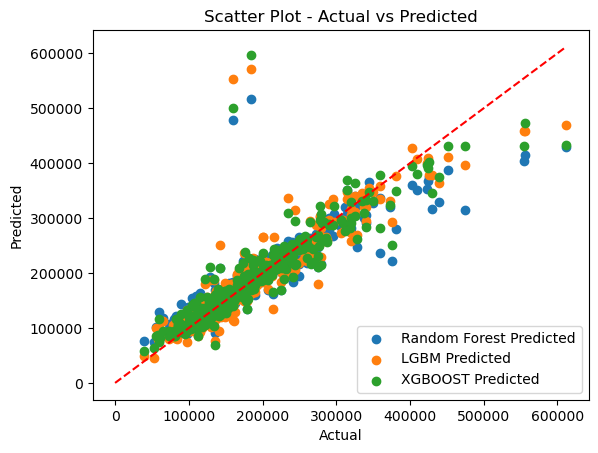

In [61]:
plt.scatter(df3['y_test_plot'],df3['y_Random_rf_pred'], label='Random Forest Predicted')

# Create a scatter plot for y_te_lgb_pred
plt.scatter(df3['y_test_plot'],df3['y_Random_lgb_pred'], label='LGBM Predicted')

# Create a scatter plot for y_test_plot (actual values)
plt.scatter(df3['y_test_plot'],df3['y_Random_xgb_pred'], label='XGBOOST Predicted')

x = np.linspace(0, max(df3['y_test_plot']), 100)
y = x
plt.plot(x, y, 'r--')

# Add labels and title to the plot
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot - Actual vs Predicted')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

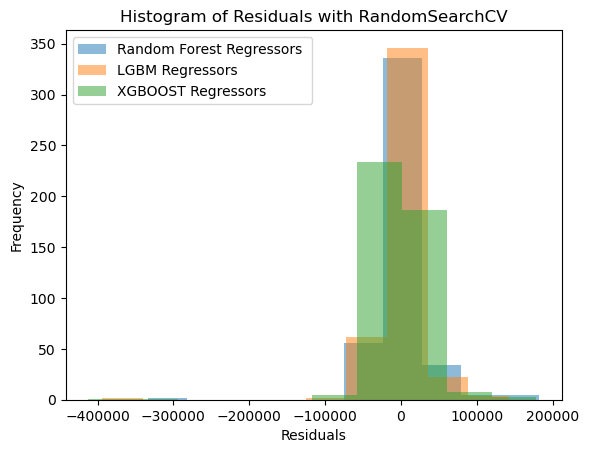

In [62]:
residuals_Random_rf = df3['y_test_plot'] - df3['y_Random_rf_pred']
residuals_Random_lgb = df3['y_test_plot'] - df3['y_Random_lgb_pred']
residuals_Random_xgb = df3['y_test_plot'] - df3['y_Random_xgb_pred']

# Create a figure and a single subplot for the histogram
fig, ax = plt.subplots()

# Plot the histograms
ax.hist(residuals_Random_rf, bins=10, alpha=0.5, label='Random Forest Regressors ')
ax.hist(residuals_Random_lgb, bins=10, alpha=0.5, label='LGBM Regressors')
ax.hist(residuals_Random_xgb , bins=10, alpha=0.5, label='XGBOOST Regressors')

# Set labels and title
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Residuals with RandomSearchCV')

# Add a legend
ax.legend(loc='upper left')

# Display the histogram
plt.show()

## 4.9 Save data<a id='4.9_Save_data'></a>

## 4.10 Summary<a id='4.10_Summary'></a>

[<a href="#4.Advance Modeling">Back to top</a>]